
# Opening Datasets

Vapor supports a variety of scientific data formats.
This notebook shows how to open a dataset and query its metadata.


In [1]:
import example_utils
from vapor import session, renderer, dataset, camera

Vapor 3.8.3
Python 3.9.16 (/Users/ncheruku/mambaforge/envs/vapor-cookbook-dev)


OpenGL 4.1 ATI-4.6.21


In [2]:
print("Supported dataset types:", dataset.Dataset.GetDatasetTypes())

Supported dataset types: ['vdc', 'wrf', 'cf', 'mpas', 'bov', 'ugrid']


In [3]:
ses = session.Session()
data = example_utils.OpenExampleDataset(ses)

# Examples of opening real data
#
# data = ses.OpenDataset(dataset.WRF, ["data/wrf_out.0001", "data/wrf_out.0002"])
# data = ses.OpenDataset(dataset.VDC, ["master.vdc"])
# data = ses.OpenDataset(dataset.MPAS, ["x1.static.nc", "diag.2021-03-04_10.30.00.nc"])


## Dump the dataset metadata


In [4]:
print("Time Coordinate Variable Name:", data.GetTimeCoordVarName())
print("Coordinate Variable Names:", data.GetCoordVarNames())

print("Dimensions:")
for dim in data.GetDimensionNames():
    print(f"  {dim}:", data.GetDimensionLength(dim, 0))

print("Data Variables:")
for var in data.GetDataVarNames():
    print(f"  {var}")
    print(f"    Time Varying:", bool(data.IsTimeVarying(var)))
    print(f"    Dimensionality:", data.GetVarGeometryDim(var))
    print(f"    Coordinates:", data.GetVarCoordVars(var, True))
    print("     Data Range:", data.GetDataRange(var))

Time Coordinate Variable Name: 
Coordinate Variable Names: ['__regCoord_64_x', '__regCoord_64_y', '__regCoord_64_z']
Dimensions:
  __regDim_64: 64
Data Variables:
  U10
    Time Varying: False
    Dimensionality: 2
    Coordinates: ['__regCoord_64_x', '__regCoord_64_y']
     Data Range: [-1.9993805885314941, 1.9994730949401855]
  V10
    Time Varying: False
    Dimensionality: 2
    Coordinates: ['__regCoord_64_x', '__regCoord_64_y']
     Data Range: [-0.2711198925971985, 0.2711198925971985]
  V
    Time Varying: False
    Dimensionality: 3
    Coordinates: ['__regCoord_64_x', '__regCoord_64_y', '__regCoord_64_z']
     Data Range: [-0.3319709300994873, 0.3319709300994873]



## Render the first 2D variable as a wireframe


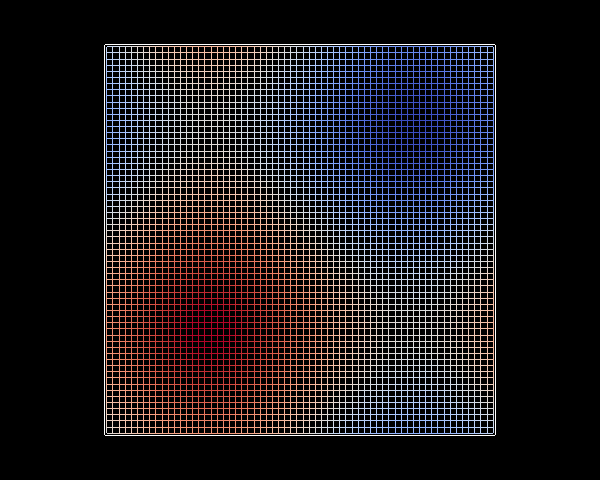

In [5]:
ren = data.NewRenderer(renderer.WireFrameRenderer)
ren.SetVariableName(data.GetDataVarNames(2)[0]) # Set to first 2D data variable

ses.GetCamera().ViewAll()
ses.Show()